# 1. Import Package

In [ ]:
import pandas as pd
import os
from torchvision.datasets.folder import default_loader
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip "/content/gdrive/MyDrive/LLM/Bok Choy/Bok Choy- Lettuce- Spinach- Diseased.v1i.tensorflow.zip"

Archive:  /content/gdrive/MyDrive/LLM/Bok Choy/Bok Choy- Lettuce- Spinach- Diseased.v1i.tensorflow.zip
replace Bok Choy- Lettuce- Spinach- Diseased.v1i.tensorflow/Disease/100_jpg.rf.18e25e1326cec556e63bae789606673a.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Bok Choy- Lettuce- Spinach- Diseased.v1i.tensorflow/Disease/100_jpg.rf.18e25e1326cec556e63bae789606673a.jpg  
  inflating: Bok Choy- Lettuce- Spinach- Diseased.v1i.tensorflow/Disease/100_jpg.rf.24f2b4e33e8f4838c754aa0ed250b868.jpg  
  inflating: Bok Choy- Lettuce- Spinach- Diseased.v1i.tensorflow/Disease/100_jpg.rf.2c6590364f57380f9a03ccda9a08061f.jpg  
  inflating: Bok Choy- Lettuce- Spinach- Diseased.v1i.tensorflow/Disease/100_jpg.rf.40fd59d5acda53639e0886dc3852da55.jpg  
  inflating: Bok Choy- Lettuce- Spinach- Diseased.v1i.tensorflow/Disease/100_jpg.rf.48a511f5f8dfc0b4155374c453359ff7.jpg  
  inflating: Bok Choy- Lettuce- Spinach- Diseased.v1i.tensorflow/Disease/100_jpg.rf.4f8e77797f90033b7e3633ee2a2dd251.jpg  
  

# 2. Load Dataset

In [ ]:
import torch
from torchvision import datasets, transforms

# Define the path to your dataset
data_path = '/content/Bok Choy- Lettuce- Spinach- Diseased.v1i.tensorflow'

# Define the transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust the size as needed
    transforms.ToTensor(),
])

# Create a PyTorch ImageFolder dataset
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Create a DataLoader for batching and shuffling
batch_size = 32  # Adjust the batch size as needed
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

{'Disease': 0, 'Healthy': 1}


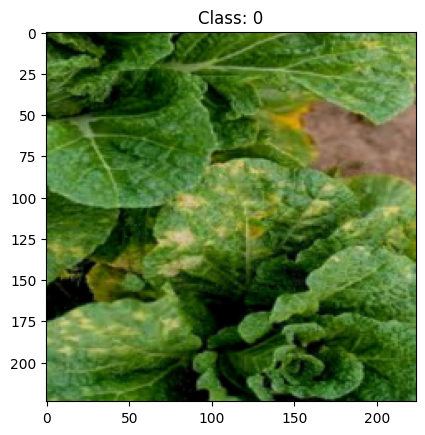

In [ ]:
print(dataset.class_to_idx)
index = 0
image, label = dataset[index]
image_np = image.permute(1, 2, 0).numpy()
plt.imshow(image_np)
plt.title(f"Class: {label}")
plt.show()

In [ ]:
num_of_class = []
for i in range (0, len(dataset)):
    image, label = dataset[i]
    num_of_class.append(label)

In [ ]:
pd.DataFrame(num_of_class).value_counts()

0    2322
1    1448
dtype: int64

In [ ]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing sets
batch_size = 32  # Adjust the batch size as needed
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch.utils as utils

train_loader = utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)

for inputs, labels in train_loader:
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

for inputs_1, labels_1 in test_loader:
    inputs_1, labels_1 = inputs_1.to('cuda'), labels_1.to('cuda')


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
len(train_loader) * 32

768

# 3. Modelling

In [ ]:
resnet_model = models.resnet50(pretrained=False).to('cuda')
num_classes = len(dataset.classes)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, num_classes).to('cuda')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.parameters(), lr = 0.001)
num_epochs = 10

In [ ]:
for epoch in range(num_epochs):
    resnet_model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        outputs = resnet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

# Evaluate the model on the test set




Epoch 1/10, Loss: 0.5309783394138018
Epoch 2/10, Loss: 0.2024899059906602
Epoch 3/10, Loss: 0.18121646779278913
Epoch 4/10, Loss: 0.10481896282484134
Epoch 5/10, Loss: 0.08507144295920928
Epoch 6/10, Loss: 0.07712747358406584
Epoch 7/10, Loss: 0.049765398066180445
Epoch 8/10, Loss: 0.04124343352547536
Epoch 9/10, Loss: 0.02369530843134271
Epoch 10/10, Loss: 0.047628666332457215


In [ ]:
resnet_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = resnet_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = (np.array(all_preds) == np.array(all_labels)).mean()
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Accuracy on the test set: 95.49%


In [ ]:
torch.save(resnet_model, 'resnet50.pth')

In [ ]:
model = torch.load('resnet50.pth').to('cuda')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
for inputs, labels in test_loader:
  inputs, labels = inputs.to('cuda'), labels.to('cuda')
  outputs = model(inputs)
  _, preds = torch.max(outputs, 1)
  all_preds.extend(preds.cpu().numpy())
  all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = (np.array(all_preds) == np.array(all_labels)).mean()
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Accuracy on the test set: 95.49%
